# About Dataset
# Dataset Description: Suicidal Tweet Detection
# This dataset provides a collection of tweets along with an annotation indicating whether each tweet is related to suicide or not. The primary objective of this dataset is to facilitate the development and evaluation of machine learning models for the classification of tweets as either expressing suicidal sentiments or not 

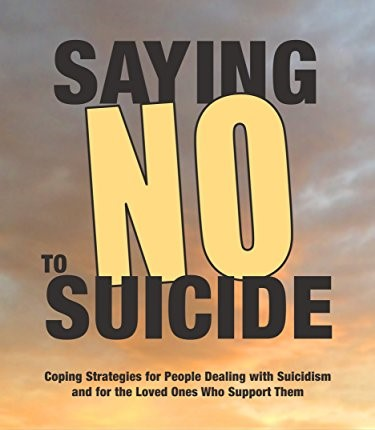

# Columns:

# Tweet: This column contains the text content of the tweets obtained from various sources. The tweets cover a wide range of topics, emotions, and expressions.
# Suicide: This column provides annotations indicating the classification of the tweets. The possible values are:
# Not Suicide post: This label is assigned to tweets that do not express any suicidal sentiments or intentions.
# Potential Suicide post: This label is assigned to tweets that exhibit indications of suicidal thoughts, feelings, or intentions.

# Potential Applications:

# Suicidal Ideation Detection: The dataset can be used to train models to automatically detect and flag tweets containing potential suicidal content, enabling platforms to take appropriate actions.
# Mental Health Support: Insights from this dataset can be used to develop tools that offer mental health resources or interventions to users who express signs of distress.
# Sentiment Analysis Research: Researchers can analyze the linguistic patterns and sentiment of both non-suicidal and potentially suicidal tweets to gain insights into the language used by individuals in different emotional states.
# Public Health Awareness: The dataset can be used to raise awareness about mental health issues and the importance of responsible social media usage.

# [N.B.: Please note that the annotations provided in the "Suicide" column are based on indicators present in the tweet text. However, the dataset does not provide any personal or identifying information about the users who posted the tweets. Researchers and developers should handle this data responsibly and ethically while considering potential user privacy concerns.]

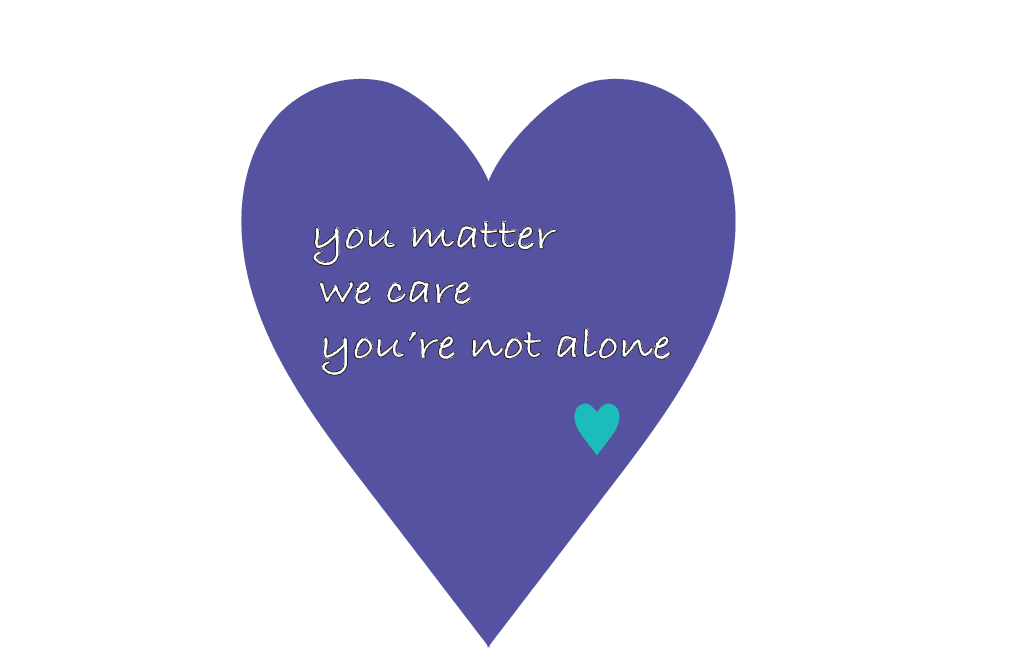

In [605]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [606]:
#importing data
data=pd.read_csv('Suicide_Ideation_Dataset(Twitter-based).csv') 

In [607]:
df=pd.read_csv('twitter-suicidal_data.csv')

In [608]:
df.head(5)

,tweet,intention
0,my life is meaningless i just want to end my l...,1
1,muttering i wanna die to myself daily for a fe...,1
2,work slave i really feel like my only purpose ...,1
3,i did something on the 2 of october i overdose...,1
4,i feel like no one cares i just want to die ma...,1


In [609]:
df.rename(columns={'tweet':'Tweet','intention':'Suicide'},inplace=True)

In [621]:
print(data.shape[0]+df.shape[0])

10906


In [622]:
# LABEL ENCODING FOR SEX
encoders_nums = {
                 "Suicide":{"Not Suicide post": 0, "Potential Suicide post ": 1}
}
data = data.replace(encoders_nums)

In [623]:
data.head()

,Tweet,Suicide
0,making some lunch,0
1,@Alexia You want his money.,0
2,@dizzyhrvy that crap took me forever to put to...,1
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,0
4,Trying out &quot;Delicious Library 2&quot; wit...,0


In [624]:
data=pd.concat([data,df],axis=0,join='inner')

In [625]:
data.shape

(10906, 2)

In [626]:
data.shape

(10906, 2)

In [627]:
data.head()

,Tweet,Suicide
0,making some lunch,0
1,@Alexia You want his money.,0
2,@dizzyhrvy that crap took me forever to put to...,1
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,0
4,Trying out &quot;Delicious Library 2&quot; wit...,0


In [628]:
#Checking head and tail of the data how data look likes
data.head(5)

,Tweet,Suicide
0,making some lunch,0
1,@Alexia You want his money.,0
2,@dizzyhrvy that crap took me forever to put to...,1
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,0
4,Trying out &quot;Delicious Library 2&quot; wit...,0


In [629]:
data.tail(5)

,Tweet,Suicide
9114,have you ever laid on your bed at night and cr...,1
9115,the fault the blame the pain s still there i m...,1
9116,stop asking me to trust you when i m still cou...,1
9117,i never know how to handle sadness crying make...,1
9118,when cancer takes a life we blame cancer depre...,1


In [630]:
data.shape

(10906, 2)

* This data has 10906 rows and 2 columns

In [631]:
data['Suicide'].value_counts()

0    6248
1    4658
Name: Suicide, dtype: int64

* This data has 1127 tweets of Not Suicide post and 660 potential Suicide post.

In [632]:
#print the unique value
data.nunique()

Tweet      10460
Suicide        2
dtype: int64

In [633]:
# Checking for null values
data.isnull().sum()


Tweet      2
Suicide    0
dtype: int64

In [634]:
# Checking for nan values
data.isna().sum()

Tweet      2
Suicide    0
dtype: int64

* As null rows are very less than actual rows so we can remove the null values 

<Figure size 1600x500 with 0 Axes>

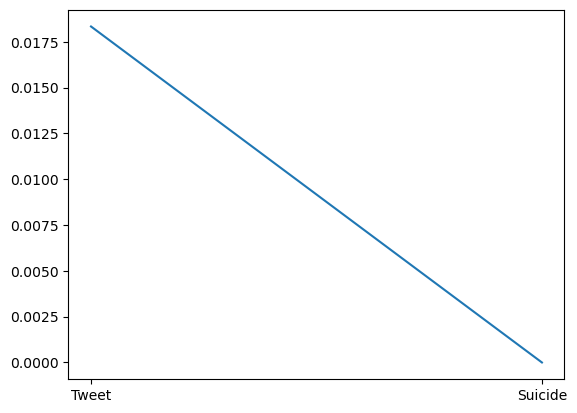

<Figure size 1600x500 with 0 Axes>

In [635]:
# plotting for null values
missing=plt.plot(((data.isnull().sum())*100)/data.shape[0])
plt.figure(figsize=(16,5))

* We have to remove this null value

In [636]:
data.dropna(inplace=True)

In [637]:
# Now check for null value
print(data.isnull().sum())
print(data.isna().sum())

Tweet      0
Suicide    0
dtype: int64
Tweet      0
Suicide    0
dtype: int64


<Figure size 1600x500 with 0 Axes>

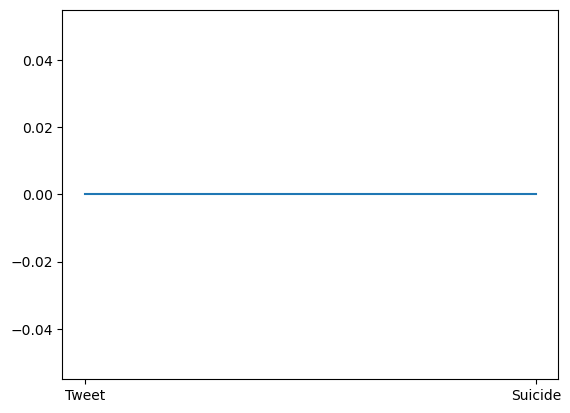

<Figure size 1600x500 with 0 Axes>

In [638]:
#plot for null values
missing=plt.plot(((data.isnull().sum())*100)/data.shape[0])
plt.figure(figsize=(16,5))

# Now there is no null values

In [639]:
value=len(data[data.duplicated()])
print("The number of duplicated value in the data set is",value)

The number of duplicated value in the data set is 443


* There are 443 duplicate value in data set we have to remove this

In [640]:
# Keep the first occurrence of the duplicates
data = data.drop_duplicates(keep='first')

In [641]:
value=len(data[data.duplicated()])
print("The number of duplicated value in dataset is", value)

The number of duplicated value in dataset is 0


* Duplicated values is removed now


In [644]:
data.head()

,Tweet,Suicide
0,making some lunch,0
1,@Alexia You want his money.,0
2,@dizzyhrvy that crap took me forever to put to...,1
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,0
4,Trying out &quot;Delicious Library 2&quot; wit...,0


In [645]:
import re


* re is a Python module that provides support for regular expressions. Regular expressions (regex or regexp) are powerful tools for pattern matching and text manipulation. They allow you to search, match, and manipulate strings based on specific patterns.

In [646]:
# re.sub(pattern, replacement, string): Searches for the pattern in the string and replaces it with the specified replacement string
def remove_special_character(obj):
    # Define a regular expression pattern to match special characters
    pattern = r'[^a-zA-Z0-9\s]'  # This pattern matches anything that's not a letter, digit, or whitespace
       # Use the sub() function to replace matched patterns with an empty string
    clean_text = re.sub(pattern, '', obj)
    clean_text=clean_text.lower()
    
    return clean_text

In [647]:
data['Tweet']=data['Tweet'].apply(remove_special_character)

In [648]:
data.head()

,Tweet,Suicide
0,making some lunch,0
1,alexia you want his money,0
2,dizzyhrvy that crap took me forever to put tog...,1
3,jnaylor kiwitweets hey jer since when did you ...,0
4,trying out quotdelicious library 2quot with mi...,0


In [649]:
data_2=data.copy(deep=True)


In [650]:
data_2.head()

,Tweet,Suicide
0,making some lunch,0
1,alexia you want his money,0
2,dizzyhrvy that crap took me forever to put tog...,1
3,jnaylor kiwitweets hey jer since when did you ...,0
4,trying out quotdelicious library 2quot with mi...,0


# Exploratory Data Analysis

In [651]:
#Counts of target varialble i.e suicide columns
data['Suicide'].value_counts()

0    5951
1    4510
Name: Suicide, dtype: int64

*  Value Counts of Not Suicide post is 1124 and Potential Suicide post is 653 



<Axes: xlabel='Suicide', ylabel='count'>

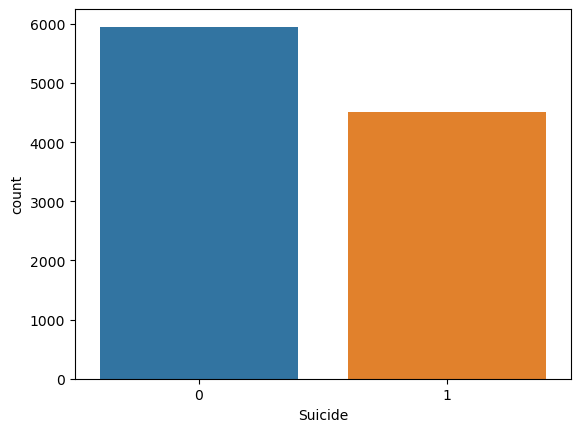

In [652]:
#plotting the count plot to vizualize the data distribution 
#plot the count plot to check the data distribution
sns.countplot(x='Suicide',data=data)

In [653]:
# LABEL ENCODING FOR SEX
encoders_nums = {
                 "Suicide":{"Not Suicide post": 0, "Potential Suicide post ": 1}
}
data_2 = data_2.replace(encoders_nums)

In [658]:
data_2.tail()

,Tweet,Suicide
9114,have you ever laid on your bed at night and cr...,1
9115,the fault the blame the pain s still there i m...,1
9116,stop asking me to trust you when i m still cou...,1
9117,i never know how to handle sadness crying make...,1
9118,when cancer takes a life we blame cancer depre...,1


In [663]:
data['Tweet']=data['Tweet'].apply(lambda x : x.replace(" ",""))
data['Tweet']=data['Tweet'].apply(lambda x : x.lower())  

In [664]:
data_2['Tweet']=data_2['Tweet'].apply(lambda x : x.lower())

In [665]:
#data_2['Tweet']=data['Tweet'].apply(lambda x : x.replace(" ",""))
    

In [666]:
data_2.head()

,Tweet,Suicide
0,making some lunch,0
1,alexia you want his money,0
2,dizzyhrvy that crap took me forever to put tog...,1
3,jnaylor kiwitweets hey jer since when did you ...,0
4,trying out quotdelicious library 2quot with mi...,0


In [667]:
data_2.columns

Index(['Tweet', 'Suicide'], dtype='object')

In [668]:
data_2['Suicide']

0       0
1       0
2       1
3       0
4       0
       ..
9114    1
9115    1
9116    1
9117    1
9118    1
Name: Suicide, Length: 10461, dtype: int64

In [670]:
data_2.shape

(10461, 2)

In [671]:
from nltk.corpus import stopwords

In [672]:
from nltk.stem.porter import PorterStemmer

In [673]:
port_stem=PorterStemmer()

In [674]:
x=data_2['Tweet']

In [675]:
y=data_2['Suicide']

In [676]:
x.shape

(10461,)

In [677]:
y.shape

(10461,)

In [678]:
from sklearn.model_selection import train_test_split

In [679]:
x_train, x_test , y_train, y_test = train_test_split(x,y,test_size=0.25)

In [680]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [681]:
vect=TfidfVectorizer()

In [682]:
X_train=vect.fit_transform(x_train)

In [683]:
X_test=vect.transform(x_test)

In [684]:
X_train.shape

(7845, 22893)

In [685]:
X_test.shape

(2616, 22893)

In [686]:
from sklearn.tree import DecisionTreeClassifier

In [687]:
import xgboost
from xgboost import XGBClassifier
model = XGBClassifier()

In [688]:
#model=DecisionTreeClassifier()


In [689]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [690]:
prediction=model.predict(X_test)

In [691]:
prediction

array([0, 0, 0, ..., 1, 0, 0])

In [692]:
model.score(X_test,y_test)

0.9124617737003058

In [693]:
import pickle

In [694]:
pickle.dump(vect,open('vect.pkl','wb'))

In [695]:
pickle.dump(model,open('model.pkl','wb'))

In [696]:
vector_form=pickle.load(open('vect.pkl','rb'))

In [697]:
load_model=pickle.load(open('model.pkl','rb'))

In [698]:
def Suicide_or_not(Tweets):
    Tweets=remove_special_character(Tweets)
    input_data=[Tweets]
    vector_form1=vector_form.transform(input_data)
    prediction=load_model.predict(vector_form1)
    return prediction

In [699]:
Suicide_or_not("dizzyhrvy that crap took me forever to put tog...")

array([1])

In [700]:
if val==[0]:
    print("Not Suicide Post")
else: 
    print("Potenial Suicide Post")

Potenial Suicide Post


In [703]:
from sklearn.metrics import confusion_matrix
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test, prediction)
print(cf_matrix)

[[1430   76]
 [ 153  957]]


<Axes: >

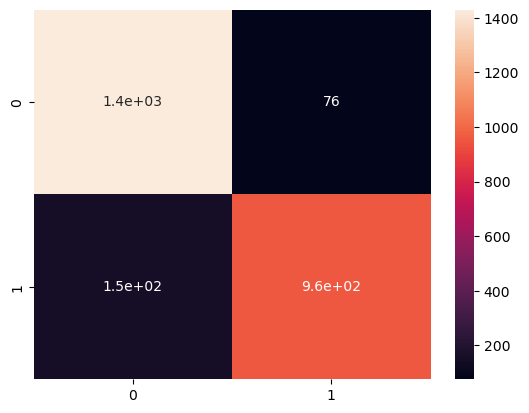

In [704]:
sns.heatmap(cf_matrix,annot=True)

In [711]:
from sklearn.neighbors import KNeighborsClassifier

In [712]:
neigh=KNeighborsClassifier(n_neighbors=4).fit(X_train,y_train)

In [713]:
y_hat=neigh.predict(X_test)

In [714]:
from sklearn import metrics

In [715]:
print("Train set Accuracy",metrics.accuracy_score(y_train,neigh.predict(X_train)))
print("Test set Accuracy",metrics.accuracy_score(y_test,y_hat))

Train set Accuracy 0.6075207138304652
Test set Accuracy 0.6085626911314985


In [716]:
from sklearn import svm

In [718]:
clf=svm.SVC(kernel='rbf')

In [719]:
clf.fit(X_train,y_train)

SVC()

In [720]:
y_hat=clf.predict(X_test)

In [722]:
print("Train set Accuracy",metrics.accuracy_score(y_train,clf.predict(X_train)))
print("Test set Accuracy",metrics.accuracy_score(y_test,y_hat))

Train set Accuracy 0.9878903760356915
Test set Accuracy 0.911697247706422


In [723]:
from sklearn.metrics import classification_report

In [727]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1506
           1       0.93      0.86      0.89      1110

    accuracy                           0.91      2616
   macro avg       0.91      0.90      0.91      2616
weighted avg       0.91      0.91      0.91      2616



In [736]:
from sklearn.metrics import roc_auc_score

In [737]:
auc = roc_auc_score(y_test, y_hat)

In [738]:
auc

0.9049477764617206

In [733]:
y_hat

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)